In [1]:
import pandas as pd

data = pd.read_csv('./data/iris.csv')
data

,id,sepal_length,sepal_width,petal_length,petal_width,species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,virginica
146,147,6.3,2.5,5.0,1.9,virginica
147,148,6.5,3.0,5.2,2.0,virginica
148,149,6.2,3.4,5.4,2.3,virginica


In [2]:
# X와 y 추출
# columns 중 'id'는 사용하지 않기 때문에 제외하고 추출
X = data.iloc[:,1:-1]
y = data.iloc[:, -1]

In [3]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
# k-fold split은 StratifiedKFold를 사용
# 각 fold마다 DecisionTreeClassifier를 적용
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sb

fold = StratifiedKFold(n_splits=5, shuffle=True)

export_text_results=[]

for i, (idx_train, idx_test) in enumerate(fold.split(X,y)):
    x_train, y_train = X.iloc[idx_train], y.iloc[idx_train]
    x_test, y_test = X.iloc[idx_test], y.iloc[idx_test]

    DT = DecisionTreeClassifier()
    DT.fit(x_train, y_train)
    y_pred = DT.predict(x_test)

    export_text_result = export_text(DT, feature_names=list(data.columns[1:-1]))
    export_text_results.append(export_text_result)

    print(f"f1_score at fold {i}:", f1_score(y_pred, y_test, average='micro'))
    print(confusion_matrix(y_pred, y_test))

f1_score at fold 0: 0.9333333333333333
[[10  0  0]
 [ 0 10  2]
 [ 0  0  8]]
f1_score at fold 1: 1.0
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]
f1_score at fold 2: 0.9666666666666667
[[10  0  0]
 [ 0  9  0]
 [ 0  1 10]]
f1_score at fold 3: 0.9
[[10  0  0]
 [ 0  8  1]
 [ 0  2  9]]
f1_score at fold 4: 0.9666666666666667
[[10  0  0]
 [ 0  9  0]
 [ 0  1 10]]


In [5]:
# decision tree 텍스트로 출력
print(export_text(DT, feature_names=list(data.columns[1:-1])))

|--- petal_length <= 2.45
|   |--- class: setosa
|--- petal_length >  2.45
|   |--- petal_width <= 1.75
|   |   |--- petal_length <= 4.95
|   |   |   |--- petal_width <= 1.65
|   |   |   |   |--- class: versicolor
|   |   |   |--- petal_width >  1.65
|   |   |   |   |--- class: virginica
|   |   |--- petal_length >  4.95
|   |   |   |--- petal_width <= 1.55
|   |   |   |   |--- class: virginica
|   |   |   |--- petal_width >  1.55
|   |   |   |   |--- petal_length <= 5.45
|   |   |   |   |   |--- class: versicolor
|   |   |   |   |--- petal_length >  5.45
|   |   |   |   |   |--- class: virginica
|   |--- petal_width >  1.75
|   |   |--- class: virginica



[Text(0.4444444444444444, 0.9166666666666666, 'x[2] <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 40, 40]'),
 Text(0.3333333333333333, 0.75, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.5555555555555556, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 80\nvalue = [0, 40, 40]'),
 Text(0.4444444444444444, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.198\nsamples = 45\nvalue = [0, 40, 5]'),
 Text(0.2222222222222222, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.05\nsamples = 39\nvalue = [0, 38, 1]'),
 Text(0.1111111111111111, 0.25, 'gini = 0.0\nsamples = 38\nvalue = [0, 38, 0]'),
 Text(0.3333333333333333, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6666666666666666, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.5555555555555556, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.7777777777777778, 0.25, 'x[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.6666666666666666, 0.08333333333333333

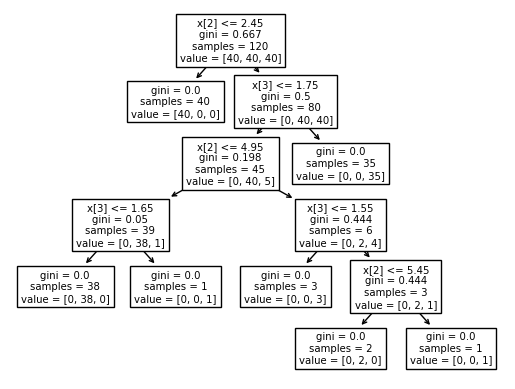

In [6]:
# decision tree 그림으로 출력
plot_tree(DT)

# 과제

In [8]:
data = pd.read_csv("./data/diabetes_prediction_dataset.csv")
data.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


In [9]:
# 숫자가 아닌 column이 존재하기 때문에 해당 column은 encoding 진행
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
# encoder를 사용해서 각 column에 대해 fit_transform() 적용
data['gender'] = encoder.fit_transform(data['gender'])
data['smoking_history'] = encoder.fit_transform(data['smoking_history'])


In [10]:
data.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0
5,0,20.0,0,0,4,27.32,6.6,85,0
6,0,44.0,0,0,4,19.31,6.5,200,1
7,0,79.0,0,0,0,23.86,5.7,85,0
8,1,42.0,0,0,4,33.64,4.8,145,0
9,0,32.0,0,0,4,27.32,5.0,100,0


In [11]:
# X와 y로 나누기
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [12]:
y.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    1
7    0
8    0
9    0
Name: diabetes, dtype: int64

In [13]:
# k-fold split은 StratifiedKFold를 사용
# 각 fold마다 DecisionTreeClassifier를 적용
# tree의 최대 깊이는 5가 되도록 설정 (혹은 다른 pruning 파라미터 사용해서 적당한 높이가 나오도록 설정)
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sb

fold = StratifiedKFold(n_splits=5, shuffle=True)

export_text_results=[]

for i, (idx_train, idx_test) in enumerate(fold.split(X,y)):
    x_train, y_train = X.iloc[idx_train], y.iloc[idx_train]
    x_test, y_test = X.iloc[idx_test], y.iloc[idx_test]

    DT = DecisionTreeClassifier(max_depth=5)
    DT.fit(x_train, y_train)
    y_pred = DT.predict(x_test)

    export_text_result = export_text(DT, feature_names=list(data.columns[:-1]))
    export_text_results.append(export_text_result)

    print(f"f1_score at fold {i}:", f1_score(y_pred, y_test, average='micro'))
    print(confusion_matrix(y_pred, y_test))

f1_score at fold 0: 0.9726499999999999
[[18300   547]
 [    0  1153]]
f1_score at fold 1: 0.97075
[[18300   585]
 [    0  1115]]
f1_score at fold 2: 0.97185
[[18300   563]
 [    0  1137]]
f1_score at fold 3: 0.97315
[[18300   537]
 [    0  1163]]
f1_score at fold 4: 0.97095
[[18300   581]
 [    0  1119]]


In [14]:
# export_text 및 plot_tree 사용해서 decision tree 출력

# decision tree 텍스트로 출력 (export_text)
print(export_text(DT, feature_names=list(data.columns[:-1])))

|--- HbA1c_level <= 6.70
|   |--- blood_glucose_level <= 210.00
|   |   |--- age <= 54.50
|   |   |   |--- hypertension <= 0.50
|   |   |   |   |--- bmi <= 39.48
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- bmi >  39.48
|   |   |   |   |   |--- class: 0
|   |   |   |--- hypertension >  0.50
|   |   |   |   |--- HbA1c_level <= 5.35
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- HbA1c_level >  5.35
|   |   |   |   |   |--- class: 0
|   |   |--- age >  54.50
|   |   |   |--- HbA1c_level <= 5.35
|   |   |   |   |--- class: 0
|   |   |   |--- HbA1c_level >  5.35
|   |   |   |   |--- blood_glucose_level <= 113.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- blood_glucose_level >  113.00
|   |   |   |   |   |--- class: 0
|   |--- blood_glucose_level >  210.00
|   |   |--- class: 1
|--- HbA1c_level >  6.70
|   |--- class: 1



[Text(0.7083333333333334, 0.9166666666666666, 'x[6] <= 6.7\ngini = 0.156\nsamples = 80000\nvalue = [73200, 6800]'),
 Text(0.625, 0.75, 'x[7] <= 210.0\ngini = 0.09\nsamples = 76837\nvalue = [73200, 3637]'),
 Text(0.5416666666666666, 0.5833333333333334, 'x[1] <= 54.5\ngini = 0.057\nsamples = 75432\nvalue = [73200, 2232]'),
 Text(0.3333333333333333, 0.4166666666666667, 'x[2] <= 0.5\ngini = 0.025\nsamples = 52817\nvalue = [52144, 673]'),
 Text(0.16666666666666666, 0.25, 'x[5] <= 39.475\ngini = 0.021\nsamples = 51254\nvalue = [50711, 543]'),
 Text(0.08333333333333333, 0.08333333333333333, 'gini = 0.017\nsamples = 49122\nvalue = [48703, 419]'),
 Text(0.25, 0.08333333333333333, 'gini = 0.11\nsamples = 2132\nvalue = [2008, 124]'),
 Text(0.5, 0.25, 'x[6] <= 5.35\ngini = 0.153\nsamples = 1563\nvalue = [1433, 130]'),
 Text(0.4166666666666667, 0.08333333333333333, 'gini = 0.0\nsamples = 559\nvalue = [559, 0]'),
 Text(0.5833333333333334, 0.08333333333333333, 'gini = 0.225\nsamples = 1004\nvalue = [

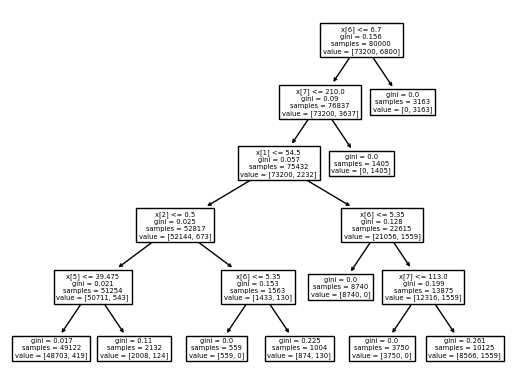

In [15]:
# decision tree 그림으로 출력 (plot_tree)
plot_tree(DT)